**Pest Classification in Mango Farms**

[Challenge Link](https://dphi.tech/challenges/data-sprint-58-pest-classification-in-mango-farms/180/overview/about)

About Model

I am using Xception model from Keras to indentify pest classifiction.

In [ ]:
!wget https://dphi-live.s3.eu-west-1.amazonaws.com/dataset/mangopests_dataset.zip

--2021-12-26 01:24:55--  https://dphi-live.s3.eu-west-1.amazonaws.com/dataset/mangopests_dataset.zip
Resolving dphi-live.s3.eu-west-1.amazonaws.com (dphi-live.s3.eu-west-1.amazonaws.com)... 52.218.92.88
Connecting to dphi-live.s3.eu-west-1.amazonaws.com (dphi-live.s3.eu-west-1.amazonaws.com)|52.218.92.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5305899330 (4.9G) [application/zip]
Saving to: ‘mangopests_dataset.zip’

mangopests_dataset. 100%[===================>]   4.94G  21.0MB/s    in 3m 58s  

2021-12-26 01:28:53 (21.3 MB/s) - ‘mangopests_dataset.zip’ saved [5305899330/5305899330]



In [ ]:
import zipfile
with zipfile.ZipFile('./mangopests_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
!pip install keras_tuner

     |████████████████████████████████| 98 kB 5.2 MB/s 


Show an image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import keras_tuner as kt

%matplotlib inline

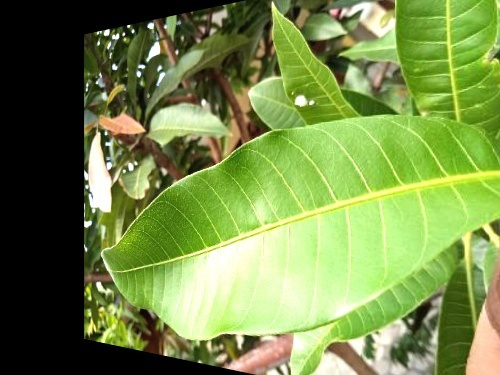

In [ ]:
path = './mangopests_dataset/train/'
name = 'Image_1.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

**Load train and test labels**

In [ ]:
train_labels = pd.read_csv('./mangopests_dataset/Training_set.csv')
test_labels = pd.read_csv('./mangopests_dataset/Testing_set.csv')

In [ ]:
train_labels.head(5)

,filename,label
0,Image_1.jpg,normal
1,Image_2.jpg,procontarinia_rubus
2,Image_3.jpg,mictis_longicornis
3,Image_4.jpg,apoderus_javanicus
4,Image_5.jpg,normal


In [ ]:
test_labels.head(5)

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


**Show some images from datasets**

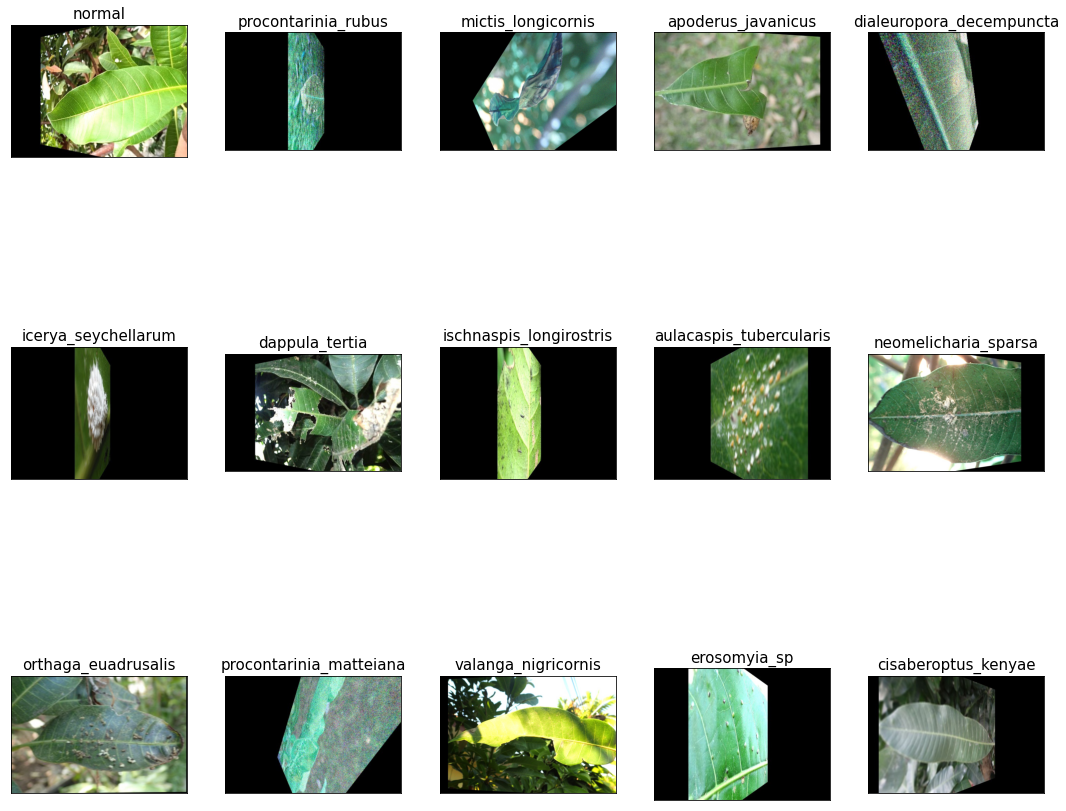

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_labels.copy().drop_duplicates(subset=["label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    fullname = f'{path}/{df_unique.filename[i]}'
    ax.imshow(plt.imread(fullname))
    ax.set_title(df_unique.label[i], fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

Update training filepname to filepath.

It will be helpful duing model fitting

In [ ]:
train_path = 'mangopests_dataset/train/'
test_path = 'mangopests_dataset/test/'

In [ ]:
train_df = train_labels.copy()
test_df = test_labels.copy()

In [ ]:
train_df = train_df.rename(columns={train_df.columns[0]: 'filepath'})
test_df = test_df.rename(columns={test_df.columns[0]: 'filepath'})

In [ ]:
train_df['filepath'] = train_path + train_df['filepath']
test_df['filepath'] = test_path + test_df['filepath']

In [ ]:
train_df.head()

,filepath,label
0,mangopests_dataset/train/Image_1.jpg,normal
1,mangopests_dataset/train/Image_2.jpg,procontarinia_rubus
2,mangopests_dataset/train/Image_3.jpg,mictis_longicornis
3,mangopests_dataset/train/Image_4.jpg,apoderus_javanicus
4,mangopests_dataset/train/Image_5.jpg,normal


In [ ]:
test_df.head()

,filepath
0,mangopests_dataset/test/Image_1.jpg
1,mangopests_dataset/test/Image_2.jpg
2,mangopests_dataset/test/Image_3.jpg
3,mangopests_dataset/test/Image_4.jpg
4,mangopests_dataset/test/Image_5.jpg


Train and validation datasets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_val = train_test_split(train_df, test_size=0.25, random_state=42)

In [ ]:
df_train.shape

(24412, 2)

In [ ]:
df_val.shape

(8138, 2)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [ ]:
df_train.head()

,filepath,label
0,mangopests_dataset/train/Image_9774.jpg,normal
1,mangopests_dataset/train/Image_25814.jpg,valanga_nigricornis
2,mangopests_dataset/train/Image_8319.jpg,orthaga_euadrusalis
3,mangopests_dataset/train/Image_3363.jpg,normal
4,mangopests_dataset/train/Image_25866.jpg,procontarinia_matteiana


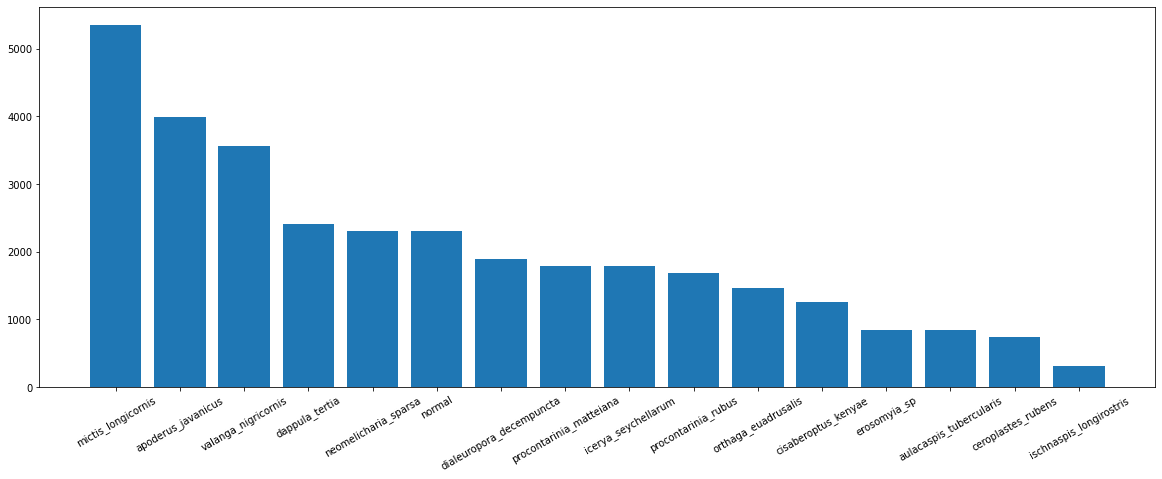

In [ ]:
plot_info = train_df['label'].value_counts()
plt.figure(figsize=(20,7))
plt.bar(plot_info.axes[0].tolist(), plot_info.values.tolist())
plt.xticks(rotation = 30)
plt.show()

**Pre-trained convolutional neural networks**

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91897856/91884032 [==============================] - 1s 0us/step


In [ ]:
path = './mangopests_dataset/train/Image_25866.jpg'

In [ ]:
img = load_img(path, target_size=(299, 299))

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)
pred = model.predict(X)

In [ ]:
decode_predictions(pred)

49152/35363 [=========================================] - 0s 0us/step


[[('n03837869', 'obelisk', 0.12427936),
  ('n03729826', 'matchstick', 0.07096753),
  ('n03633091', 'ladle', 0.04406115),
  ('n03903868', 'pedestal', 0.039676562),
  ('n03658185', 'letter_opener', 0.039007083)]]

**Let's start first model: Xception**

In [ ]:
train_generator = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=df_val,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 24412 validated image filenames belonging to 16 classes.
Found 8138 validated image filenames belonging to 16 classes.


In [ ]:
train_images.class_indices

{'apoderus_javanicus': 0,
 'aulacaspis_tubercularis': 1,
 'ceroplastes_rubens': 2,
 'cisaberoptus_kenyae': 3,
 'dappula_tertia': 4,
 'dialeuropora_decempuncta': 5,
 'erosomyia_sp': 6,
 'icerya_seychellarum': 7,
 'ischnaspis_longirostris': 8,
 'mictis_longicornis': 9,
 'neomelicharia_sparsa': 10,
 'normal': 11,
 'orthaga_euadrusalis': 12,
 'procontarinia_matteiana': 13,
 'procontarinia_rubus': 14,
 'valanga_nigricornis': 15}

In [ ]:
# Load the pretained model
pretrained_model = Xception(
    weights='imagenet',
    pooling='avg',
    include_top = False,
    input_shape=(224, 224, 3)
)
pretrained_model.trainable = False

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
!pip install tfa-nightly

     |████████████████████████████████| 1.1 MB 7.5 MB/s 


In [ ]:
from keras import backend as K
import tensorflow_addons as tfa

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
# Final model
inputs = pretrained_model.input

x = keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = keras.layers.Dense(128, activation='relu')(x)

outputs = keras.layers.Dense(16, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy',tfa.metrics.F1Score(num_classes=16,average="weighted",threshold=0.9,name="f1_score")]
)
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 16,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        ),
        checkpoint
    ]  
)

Epoch 1/10
763/763 [==============================] - ETA: 0s - loss: 0.7485 - accuracy: 0.7638 - f1_score: 0.5620

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


763/763 [==============================] - 6060s 8s/step - loss: 0.7485 - accuracy: 0.7638 - f1_score: 0.5620 - val_loss: 0.4450 - val_accuracy: 0.8470 - val_f1_score: 0.7208
Epoch 2/10
763/763 [==============================] - 6380s 8s/step - loss: 0.3343 - accuracy: 0.8925 - f1_score: 0.8027 - val_loss: 0.3466 - val_accuracy: 0.8887 - val_f1_score: 0.8112
Epoch 3/10
763/763 [==============================] - 6041s 8s/step - loss: 0.2385 - accuracy: 0.9207 - f1_score: 0.8671 - val_loss: 0.2739 - val_accuracy: 0.9089 - val_f1_score: 0.8510
Epoch 4/10
763/763 [==============================] - 5987s 8s/step - loss: 0.1865 - accuracy: 0.9377 - f1_score: 0.8932 - val_loss: 0.2991 - val_accuracy: 0.9008 - val_f1_score: 0.8645
Epoch 5/10
763/763 [==============================] - 5979s 8s/step - loss: 0.1391 - accuracy: 0.9539 - f1_score: 0.9196 - val_loss: 0.2810 - val_accuracy: 0.9110 - val_f1_score: 0.8838


**Best accuracy is: 95.39%**

**Best Weighted F1 score is: 91.96%**

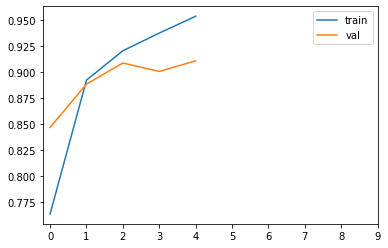

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

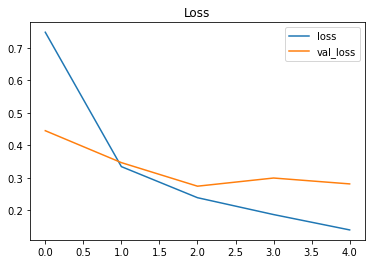

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

**Predict with our best model**

In [40]:
model = keras.models.load_model('./xception_v1_05_0.911.h5')

In [41]:
class_names = ['apoderus_javanicus',
 'aulacaspis_tubercularis',
 'ceroplastes_rubens',
 'cisaberoptus_kenyae',
 'dappula_tertia',
 'dialeuropora_decempuncta',
 'erosomyia_sp',
 'icerya_seychellarum',
 'ischnaspis_longirostris',
 'mictis_longicornis',
 'neomelicharia_sparsa',
 'normal',
 'orthaga_euadrusalis',
 'procontarinia_matteiana',
 'procontarinia_rubus',
 'valanga_nigricornis']

In [44]:
path = './mangopests_dataset/test/Image_10.jpg'

In [45]:
img = load_img(path, target_size=(224, 224))
x = np.array(img)
X = np.array([x])

In [46]:
X = preprocess_input(X)
pred = model.predict(X)
pred

array([[1.9234623e-04, 2.5886372e-06, 4.4172789e-06, 2.6598768e-04,
        4.1368259e-03, 5.2352579e-08, 7.5445826e-08, 3.7750281e-10,
        2.7589857e-09, 1.6365910e-06, 1.9601634e-04, 1.9240109e-04,
        1.2063761e-02, 3.2784271e-07, 1.1643575e-03, 9.8177916e-01]],
      dtype=float32)

In [47]:
result= dict(zip(class_names, pred[0]))
max(zip(result.values(), result.keys()))[1]

'valanga_nigricornis'

Testing with datasets

In [53]:
test_dataset = test_df.copy()

In [54]:
test_dataset['label'] = ''

In [55]:
test_dataset.head()

,filepath,label
0,mangopests_dataset/test/Image_1.jpg,
1,mangopests_dataset/test/Image_2.jpg,
2,mangopests_dataset/test/Image_3.jpg,
3,mangopests_dataset/test/Image_4.jpg,
4,mangopests_dataset/test/Image_5.jpg,


In [56]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_dataset,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 13950 validated image filenames belonging to 1 classes.


In [57]:
pred = model.predict(test_images)
pred

array([[3.7799974e-03, 2.6921891e-09, 3.1841629e-10, ..., 2.6087612e-06,
        5.4647109e-05, 2.8443802e-03],
       [3.3830723e-01, 2.4026928e-04, 3.2664561e-06, ..., 1.9840476e-04,
        7.7167168e-02, 2.5682807e-01],
       [4.8111379e-03, 1.4172243e-06, 1.9121443e-10, ..., 5.7504693e-08,
        3.9113223e-07, 1.5289945e-07],
       ...,
       [8.0300710e-04, 3.2883886e-08, 3.0712663e-08, ..., 2.7981191e-06,
        4.8043348e-06, 5.3847347e-05],
       [4.1903878e-08, 2.5699423e-10, 6.3341645e-07, ..., 3.5904787e-10,
        2.2413619e-08, 2.5686878e-10],
       [8.0251988e-07, 1.9271783e-10, 5.6349299e-13, ..., 7.4454377e-08,
        4.5683488e-09, 1.0933432e-07]], dtype=float32)

In [61]:
result= dict(zip(class_names, pred[9]))
max(zip(result.values(), result.keys()))[1]

'valanga_nigricornis'

In [89]:
final_test_result = pd.read_csv('./mangopests_dataset/Testing_set.csv')

In [90]:
final_test_result['label'] = ''

In [91]:
final_test_result.head()

,filename,label
0,Image_1.jpg,
1,Image_2.jpg,
2,Image_3.jpg,
3,Image_4.jpg,
4,Image_5.jpg,


In [92]:
for idx, val in enumerate(pred):
    result= dict(zip(class_names, val))
    pred_label = max(zip(result.values(), result.keys()))[1]
    final_test_result.at[idx,'label']=pred_label

In [93]:
final_test_result.head(10)

,filename,label
0,Image_1.jpg,dappula_tertia
1,Image_2.jpg,apoderus_javanicus
2,Image_3.jpg,mictis_longicornis
3,Image_4.jpg,dappula_tertia
4,Image_5.jpg,neomelicharia_sparsa
5,Image_6.jpg,valanga_nigricornis
6,Image_7.jpg,apoderus_javanicus
7,Image_8.jpg,apoderus_javanicus
8,Image_9.jpg,mictis_longicornis
9,Image_10.jpg,valanga_nigricornis


In [95]:
from google.colab import files
final_test_result.to_csv('submission.csv')         
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>